<a href="https://colab.research.google.com/github/ericchoi97/Data_Science/blob/main/(1.%20Financial)%20Tech%20Options%20Chain%20Visualized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


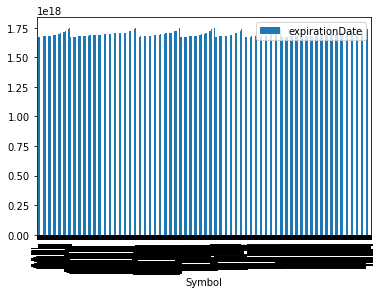

In [10]:
!pip install yfinance
import yfinance as yf
import pandas as pd
from google.colab import data_table

data_table.enable_dataframe_formatter()

yf.pdr_override()

stocklist = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NFLX', 'TSLA']
optionsX = pd.DataFrame()

for x in stocklist:
    tk = yf.Ticker(x)  
    exps = tk.options  #expiration dates
    try:
        for e in exps:
            opt = tk.option_chain(e)
            opt = pd.DataFrame().append(opt.calls).append(opt.puts)
            opt['expirationDate'] = pd.to_datetime(e)
            opt['Symbol'] = x
            optionsX = optionsX.append(opt, ignore_index=True)
    except:
        pass

# Output the chart
optionsX['expirationDate'] = pd.to_numeric(optionsX['expirationDate']) 
optionsX['Symbol'] = pd.Categorical(optionsX['Symbol']) 

#convert expirationDate to numeric and Symbol to Categorical
optionsX.plot(x='Symbol', y='expirationDate', kind="bar")